In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

In [2]:
def BGR2RGB(img):
    """ function to convert BGR image into RGB image """
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

def BGR2Gray(img):
    """ function to convert BGR image into Gray image """
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [3]:
# read images, note that in the format of BGR instead of RGB
dog = cv.imread('./images/dog.jpeg')
panda = cv.imread('./images/panda.jpeg')
man = cv.imread('./images/man.jpg')
woman = cv.imread('./images/woman.jpg')

In [4]:
# transform BGR image into gray scale
images = [dog, panda, man, woman]
grays = []

for img in images:
    grays.append(BGR2Gray(img))

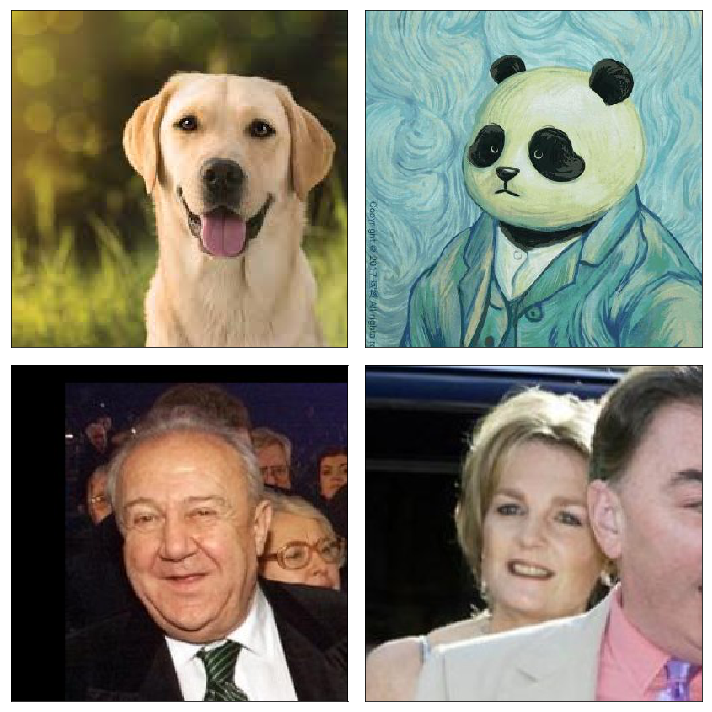

In [5]:
# visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i in range(4):
    ax[i // 2][i % 2].imshow(BGR2RGB(images[i]))
    ax[i // 2][i % 2].set_xticks([])
    ax[i // 2][i % 2].set_yticks([])
plt.tight_layout()
plt.show()

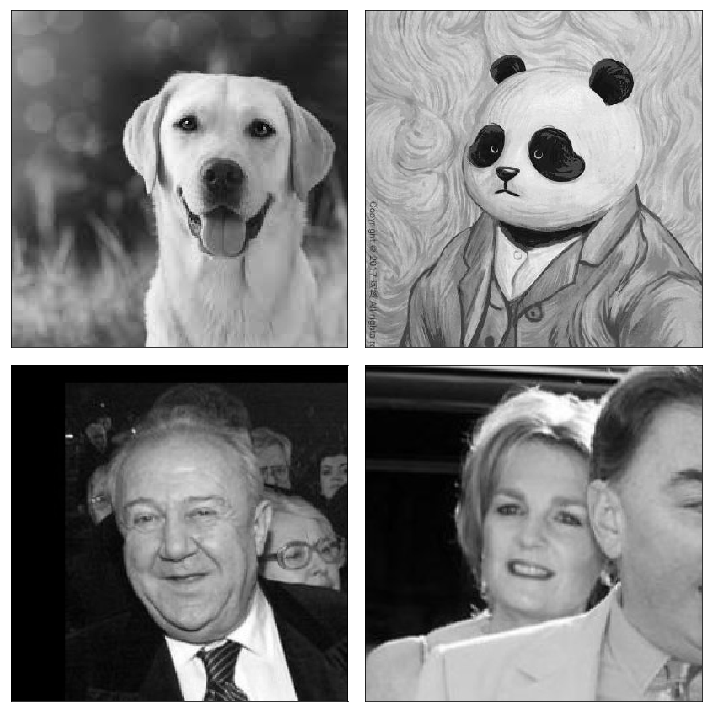

In [6]:
# visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i in range(4):
    ax[i // 2][i % 2].imshow(grays[i], cmap='gray')
    ax[i // 2][i % 2].set_xticks([])
    ax[i // 2][i % 2].set_yticks([])
plt.tight_layout()
plt.show()

In [7]:
# load Cascade Classifier
face_cascade = cv.CascadeClassifier('./xmls/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./xmls/haarcascade_eye.xml')

for img, gray in zip(images, grays):
    # detect face and eyes
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv.rectangle(img, (x,y), (x+w, y+h),(255,0,0),2)
        roi_gray = gray[y: y+h, x: x+w]
        roi_color = img[y: y+h, x: x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)

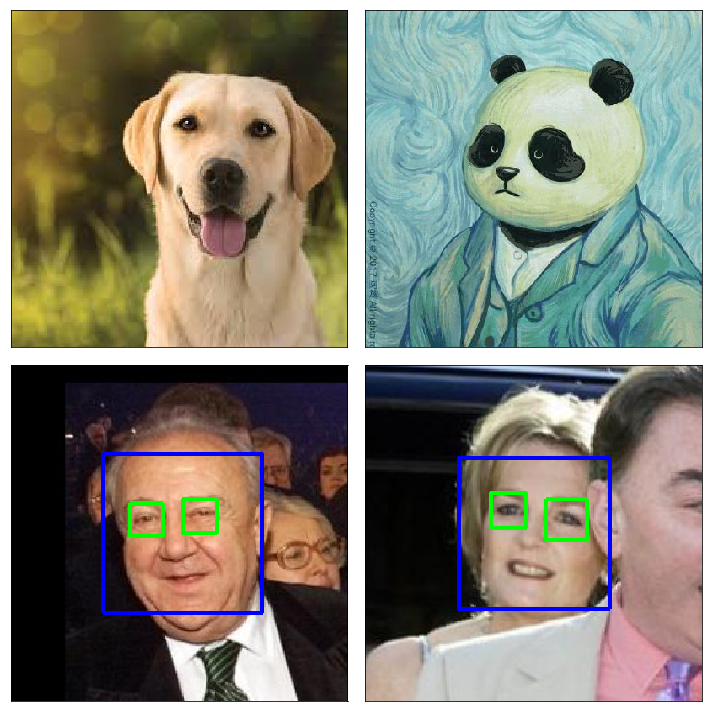

In [8]:
# visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i in range(4):
    ax[i // 2][i % 2].imshow(BGR2RGB(images[i]))
    ax[i // 2][i % 2].set_xticks([])
    ax[i // 2][i % 2].set_yticks([])
plt.tight_layout()
plt.show()

# Test for Single Image

In [10]:
# read image
img = cv.imread('./images/test.jpg')
gray = BGR2Gray(img)

In [11]:
# load Cascade Classifier
face_cascade = cv.CascadeClassifier('./xmls/haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('./xmls/haarcascade_eye.xml')

# detect face and eyes
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv.rectangle(img, (x,y), (x+w, y+h),(255,0,0),2)
    roi_gray = gray[y: y+h, x: x+w]
    roi_color = img[y: y+h, x: x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)

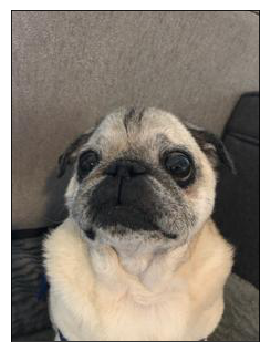

In [13]:
# visualization
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(BGR2RGB(img))
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()